In [1]:
import xarray as xr
import numpy as np

In [20]:
ds = xr.open_dataset('/g/data/k10/cb4968/data/sample_data/cl/cmip6/IITM-ESM_cl_monthly_historical_regridded.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 360, lev: 19, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lev      (lev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    cl       (time, lev, lat, lon) float32 ...

In [53]:
da = ds['cl']
da

<xarray.DataArray 'cl' (time: 360, lev: 19, lat: 22, lon: 128)>
array([[[[0.040541, ..., 0.018927],
         ...,
         [0.06255 , ..., 0.110478]],

        ...,

        [[0.      , ..., 0.      ],
         ...,
         [0.      , ..., 0.      ]]],


       ...,


       [[[0.02428 , ..., 0.021193],
         ...,
         [0.019759, ..., 0.118514]],

        ...,

        [[0.      , ..., 0.      ],
         ...,
         [0.      , ..., 0.      ]]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lev      (lev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          %

In [23]:
ds_p = xr.open_dataset('/g/data/k10/cb4968/data/sample_data/p_hybridsigma/cmip6/IITM-ESM_p_hybridsigma_monthly_historical_regridded.nc')
ds_p

<xarray.Dataset>
Dimensions:        (lev: 19)
Coordinates:
  * lev            (lev) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Data variables:
    p_hybridsigma  (lev) float64 ...

In [26]:
p_hybridsigma = ds_p['p_hybridsigma']
p_hybridsigma

<xarray.DataArray 'p_hybridsigma' (lev: 19)>
[19 values with dtype=float64]
Coordinates:
  * lev      (lev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Attributes:
    units:

In [54]:
plevs1, plevs2 = [250e2, 0], [1500e2, 600e2]
da = da.where((p_hybridsigma <= plevs2[0]) & (p_hybridsigma >= plevs2[1]), 0).max(dim='lev')
da

<xarray.DataArray 'cl' (time: 360, lat: 22, lon: 128)>
array([[[ 4.499582  ,  4.113385  ,  2.8202803 , ...,  6.1075583 ,
          5.634045  ,  4.7405066 ],
        [ 5.436361  ,  4.424976  ,  2.7417119 , ...,  5.8356366 ,
          5.9920177 ,  5.6038136 ],
        [ 5.354536  ,  4.47014   ,  2.731907  , ...,  5.984982  ,
          6.1296997 ,  5.9914026 ],
        ...,
        [ 0.8350631 ,  0.95419794,  2.0525286 , ...,  1.6957681 ,
          1.214991  ,  0.9531119 ],
        [ 2.287151  ,  1.9161483 ,  1.6907616 , ...,  3.64273   ,
          2.6310103 ,  2.3942647 ],
        [ 3.4876509 ,  3.5236943 ,  2.533122  , ...,  8.213988  ,
          3.7633672 ,  3.1007595 ]],

       [[ 9.421852  ,  7.152312  ,  5.99928   , ..., 11.021332  ,
         14.164288  , 12.8249655 ],
        [12.004705  ,  8.477619  ,  4.466776  , ...,  7.538531  ,
          8.201972  , 10.487882  ],
        [10.073027  ,  8.423895  ,  7.903405  , ...,  8.251451  ,
          7.3246574 ,  8.7550335 ],
...
        [ 1.4312483 ,  1.6887527 ,  1.8709104 , ...,  2.231169  ,
          3.114478  ,  2.5642722 ],
        [ 1.5401818 ,  2.5098808 ,  3.2522457 , ...,  3.6418002 ,
          2.8814669 ,  2.3519251 ],
        [ 2.9700303 ,  3.3987277 ,  2.8463635 , ...,  8.974737  ,
          6.843854  ,  3.9437761 ]],

       [[ 3.596544  ,  2.9543278 ,  3.0317812 , ..., 12.598307  ,
          8.829592  ,  5.0208473 ],
        [ 2.751349  ,  1.8818104 ,  1.4871416 , ..., 12.891178  ,
          7.5116215 ,  4.28721   ],
        [ 3.6311114 ,  1.7674983 ,  1.2854505 , ..., 11.057531  ,
          6.201657  ,  5.191939  ],
        ...,
        [ 4.232051  ,  5.4804406 ,  3.4693658 , ...,  2.565066  ,
          2.7085323 ,  3.4439197 ],
        [ 4.55241   ,  5.124968  ,  3.7405672 , ...,  3.8838143 ,
          4.052229  ,  3.8610725 ],
        [ 5.414558  ,  6.1563096 ,  5.269558  , ...,  9.651013  ,
         10.333829  ,  6.922371  ]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

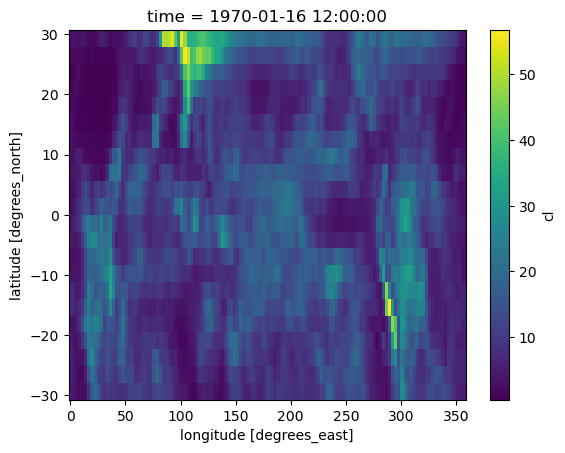

In [30]:
da.isel(time=0).plot()

In [31]:
da_day = da.isel(time=0)
da_day

<xarray.DataArray 'cl' (lat: 22, lon: 128)>
array([[4.499582  , 4.113385  , 2.8202803 , ..., 6.1075583 , 5.634045  ,
        4.7405066 ],
       [5.436361  , 4.424976  , 2.7417119 , ..., 5.8356366 , 5.9920177 ,
        5.6038136 ],
       [5.354536  , 4.47014   , 2.731907  , ..., 5.984982  , 6.1296997 ,
        5.9914026 ],
       ...,
       [0.8350631 , 0.95419794, 2.0525286 , ..., 1.6957681 , 1.214991  ,
        0.9531119 ],
       [2.287151  , 1.9161483 , 1.6907616 , ..., 3.64273   , 2.6310103 ,
        2.3942647 ],
       [3.4876509 , 3.5236943 , 2.533122  , ..., 8.213988  , 3.7633672 ,
        3.1007595 ]], dtype=float32)
Coordinates:
    time     object 1970-01-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [32]:
da_day.mean(dim=('lat', 'lon'))

<xarray.DataArray 'cl' ()>
array(11.51448, dtype=float32)
Coordinates:
    time     object 1970-01-16 12:00:00

In [33]:
ds_wap = xr.open_dataset('/g/data/k10/cb4968/data/sample_data/wap/cmip6/IITM-ESM_wap_monthly_historical_regridded.nc')
ds_wap

<xarray.Dataset>
Dimensions:  (time: 360, plev: 19, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap      (time, plev, lat, lon) float32 ...

In [50]:
da_wap = ds_wap['wap']
da_wap

<xarray.DataArray 'wap' (time: 360, plev: 19, lat: 22, lon: 128)>
[19261440 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    hPa day$^-1$

In [38]:
da_wap_day = da_wap.isel(time=0).sel(plev = 500e2)
da_wap_day

<xarray.DataArray 'wap' (lat: 22, lon: 128)>
[2816 values with dtype=float32]
Coordinates:
    time     object 1970-01-16 12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    hPa day$^-1$

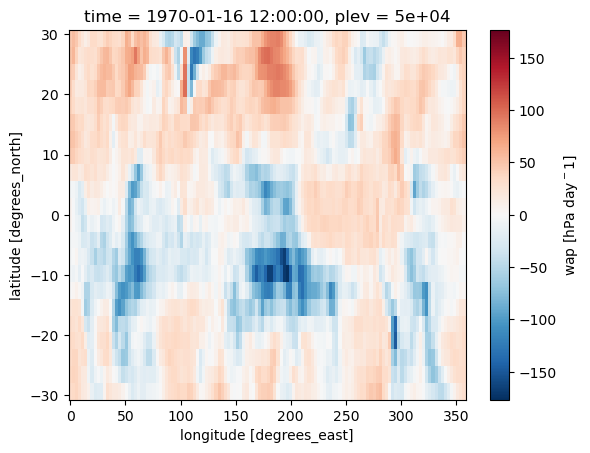

In [39]:
da_wap_day.plot()

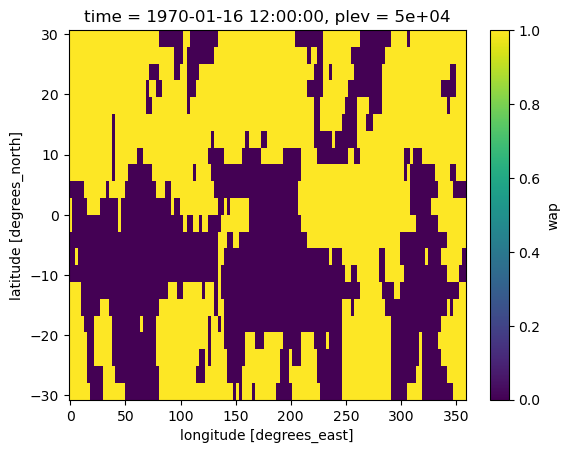

In [40]:
(da_wap_day>0).plot()

In [47]:
da_day_d = da_day.where(da_wap_day>0)
da_day_d

<xarray.DataArray 'cl' (lat: 22, lon: 128)>
array([[4.499582  , 4.113385  , 2.8202803 , ..., 6.1075583 , 5.634045  ,
        4.7405066 ],
       [5.436361  , 4.424976  , 2.7417119 , ..., 5.8356366 , 5.9920177 ,
        5.6038136 ],
       [5.354536  , 4.47014   , 2.731907  , ..., 5.984982  , 6.1296997 ,
        5.9914026 ],
       ...,
       [0.8350631 , 0.95419794, 2.0525286 , ..., 1.6957681 , 1.214991  ,
        0.9531119 ],
       [2.287151  , 1.9161483 , 1.6907616 , ..., 3.64273   , 2.6310103 ,
        2.3942647 ],
       [3.4876509 , 3.5236943 , 2.533122  , ..., 8.213988  , 3.7633672 ,
        3.1007595 ]], dtype=float32)
Coordinates:
    time     object 1970-01-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    plev     float64 5e+04

In [48]:
da_day_d.mean(dim = ('lat', 'lon')).data

array(9.09312, dtype=float32)

In [55]:
da_d = da.where(da_wap.sel(plev = 500e2)>0)
da_d

<xarray.DataArray 'cl' (time: 360, lat: 22, lon: 128)>
array([[[ 4.499582  ,  4.113385  ,  2.8202803 , ...,  6.1075583 ,
          5.634045  ,  4.7405066 ],
        [ 5.436361  ,  4.424976  ,  2.7417119 , ...,  5.8356366 ,
          5.9920177 ,  5.6038136 ],
        [ 5.354536  ,  4.47014   ,  2.731907  , ...,  5.984982  ,
          6.1296997 ,  5.9914026 ],
        ...,
        [ 0.8350631 ,  0.95419794,  2.0525286 , ...,  1.6957681 ,
          1.214991  ,  0.9531119 ],
        [ 2.287151  ,  1.9161483 ,  1.6907616 , ...,  3.64273   ,
          2.6310103 ,  2.3942647 ],
        [ 3.4876509 ,  3.5236943 ,  2.533122  , ...,  8.213988  ,
          3.7633672 ,  3.1007595 ]],

       [[ 9.421852  ,  7.152312  ,  5.99928   , ..., 11.021332  ,
         14.164288  , 12.8249655 ],
        [12.004705  ,  8.477619  ,  4.466776  , ...,  7.538531  ,
          8.201972  , 10.487882  ],
        [10.073027  ,  8.423895  ,  7.903405  , ...,  8.251451  ,
          7.3246574 ,  8.7550335 ],
...
        [ 1.4312483 ,  1.6887527 ,  1.8709104 , ...,  2.231169  ,
          3.114478  ,  2.5642722 ],
        [ 1.5401818 ,         nan,         nan, ...,  3.6418002 ,
          2.8814669 ,  2.3519251 ],
        [ 2.9700303 ,         nan,         nan, ...,  8.974737  ,
          6.843854  ,  3.9437761 ]],

       [[ 3.596544  ,  2.9543278 ,  3.0317812 , ..., 12.598307  ,
          8.829592  ,  5.0208473 ],
        [ 2.751349  ,  1.8818104 ,  1.4871416 , ..., 12.891178  ,
          7.5116215 ,  4.28721   ],
        [ 3.6311114 ,  1.7674983 ,  1.2854505 , ..., 11.057531  ,
          6.201657  ,  5.191939  ],
        ...,
        [        nan,         nan,         nan, ...,  2.565066  ,
          2.7085323 ,         nan],
        [        nan,         nan,         nan, ...,  3.8838143 ,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  9.651013  ,
         10.333829  ,         nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    plev     float64 5e+04

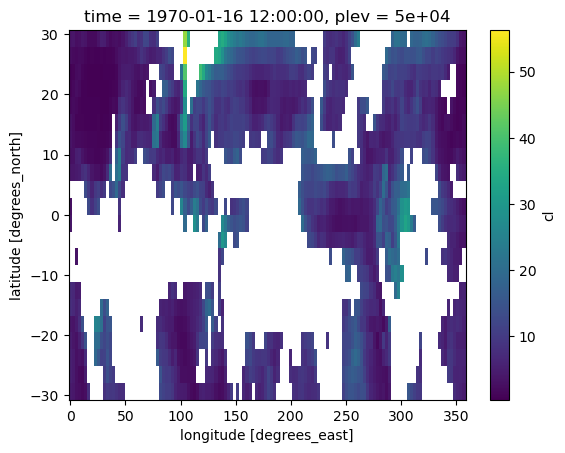

In [56]:
da_d.isel(time=0).plot()

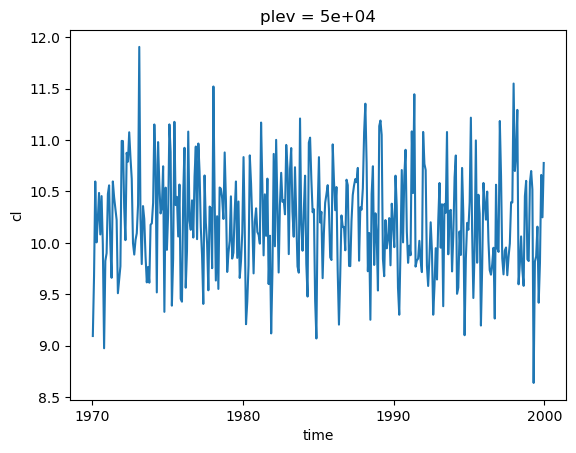

In [69]:
aWeights = np.cos(np.deg2rad(da.lat))
da_d.mean(dim = ('lat', 'lon')).plot()

In [2]:
a = xr.open_dataset('/g/data/k10/cb4968/data/metrics/lcf/lcf_d_sMean/cmip6/IITM-ESM_lcf_d_sMean_monthly_historical_regridded.nc')
a

ERROR 1: PROJ: proj_create_from_database: Open of /g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/share/proj failed


<xarray.Dataset>
Dimensions:      (time: 360)
Coordinates:
  * time         (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev         float64 ...
Data variables:
    lcf_d_sMean  (time) float64 ...

In [3]:
a['lcf_d_sMean'].data[0:5]

array([ 9.09558477,  9.68100741, 10.60067075, 10.02460895, 10.23188216])